In [15]:
import numpy as np
from functools import partial

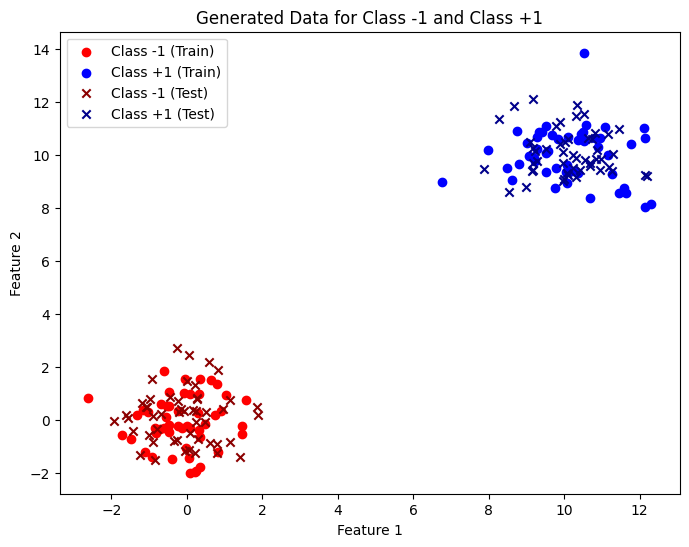

In [16]:
# Parameters for the normal distributions
mu1 = [0, 0]  # Mean for class -1
mu2 = [10, 10]  # Mean for class +1
sigma = np.eye(2)  # Identity matrix as the covariance matrix (σ = I)

np.random.seed(42)

# Generate 100 data points for each class
class_minus_1_train = np.random.multivariate_normal(mu1, sigma, 50)  # 50 points for training class -1
class_minus_1_test = np.random.multivariate_normal(mu1, sigma, 50)   # 50 points for testing class -1

class_plus_1_train = np.random.multivariate_normal(mu2, sigma, 50)   # 50 points for training class +1
class_plus_1_test = np.random.multivariate_normal(mu2, sigma, 50)    # 50 points for testing class +1

# Combine the training and test sets
X_train = np.vstack((class_minus_1_train, class_plus_1_train))  # Training data
X_test = np.vstack((class_minus_1_test, class_plus_1_test))    # Test data

# Create the corresponding labels for training and test sets
y_train = np.concatenate((np.ones(50) * -1, np.ones(50)))  # Labels: -1 for class -1, +1 for class +1
y_test = np.concatenate((np.ones(50) * -1, np.ones(50)))   # Labels for test data

# Optional: Plot the generated data to visualize the distribution
plt.figure(figsize=(8, 6))
plt.scatter(class_minus_1_train[:, 0], class_minus_1_train[:, 1], color='red', label='Class -1 (Train)')
plt.scatter(class_plus_1_train[:, 0], class_plus_1_train[:, 1], color='blue', label='Class +1 (Train)')
plt.scatter(class_minus_1_test[:, 0], class_minus_1_test[:, 1], color='darkred', label='Class -1 (Test)', marker='x')
plt.scatter(class_plus_1_test[:, 0], class_plus_1_test[:, 1], color='darkblue', label='Class +1 (Test)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Generated Data for Class -1 and Class +1')
plt.show()

In [321]:
# def classify(X, y, maxitercnt=10000):
#     rows, cols = X.shape
#     nv = nw = 0
#     v = w = np.zeros(cols + 1)
#     itercnt = 0
#     ones_column = np.ones((X.shape[0], 1))
#     new_X = np.hstack((ones_column, X))
#     np.random.seed(42)
#     while itercnt <= maxitercnt:
#         random_index = np.random.choice(rows)
#         xj, yj = new_X[random_index], y[random_index]
#         yhat = 1 if np.dot(v, xj) >= 0 else -1

#         if yhat * yj > 0:
#             nv += 1
#         else:
#             if nv > nw:
#                 w = v
#                 nw = nv
            
#             v += yj * xj
#             nv = 0
        
#         itercnt += 1

#     return w

def classify(X, y, maxitercnt=10000):
    rows, cols = X.shape
    v = np.zeros(cols + 1)  # Initialize weights (including bias)
    w = np.zeros(cols + 1)  # Best weights found
    best_accuracy = 0
    ones_column = np.ones((X.shape[0], 1))
    new_X = np.hstack((ones_column, X))  # Add bias term

    np.random.seed(42)

    for itercnt in range(maxitercnt):
        random_index = np.random.choice(rows)
        xj, yj = new_X[random_index], y[random_index]
        yhat = np.sign(np.dot(v, xj))

        # Update weights if there's a misclassification
        if yhat != yj:
            v += yj * xj

        # Evaluate current weight vector on the full dataset
        predictions = np.sign(np.dot(new_X, v))
        accuracy = np.mean(predictions == y)

        # If this weight vector performs better, save it
        if accuracy > best_accuracy:
            w = v.copy()
            best_accuracy = accuracy

    return w



# weights = classify(X_train, y_train)
# weights

In [18]:
def predict(X, weights=weights):
    arr = np.dot(X, weights[1:]) + weights[0]
    return np.sign(arr)

predict(X_test)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

#### Adaboost

In [353]:
# def adabtrain(X_train, y_train, k=1):
#     rows, _ = X_train.shape
#     weights = np.full(rows, 1/rows)
#     alphas = []
#     hypotheses = []
#     for t in range(k):
#         # Select new training set
#         np.random.seed(t)
#         resampled_indices = np.random.choice(
#             np.arange(rows), size=rows, replace=True, p=weights)
#         X_resampled = X_train[resampled_indices]
#         y_resampled = y_train[resampled_indices]

#         # train weak learner to get hypothesis
#         w = classify(X_resampled, y_resampled)
#         hypothesis = partial(predict, weights=w)
#         hypotheses.append(hypothesis)
#         hyp_training = hypothesis(X_resampled)

#         # compute training error
#         delta = (hyp_training != y_resampled).astype(int)
#         epsilon = np.sum(weights[resampled_indices] * delta)

#         # compute coefficient
#         alpha = 0.5 * np.log((1 - epsilon) / epsilon)
#         alphas.append(alpha)

#         # compute new sample weight
#         single_wt_upd = weights * np.exp(-alpha * y_train * hyp_training)
#         z = np.sum(single_wt_upd)
#         weights = single_wt_upd / z

#         print(f'Iteration {t}: Weak learner accuracy: {(hyp_training == y_train).astype(int).sum() / len(y_train)}')
#         print(f'Iteration {t}: Epsilon = {epsilon}')
#         print(f'Iteration {t}: Alpha = {alpha}')
#         print(f'Sum of weights after normalization for iter {t}: {np.sum(weights)}')

#     alphas = np.array(alphas)
#     hypotheses = np.array(hypotheses)
#     return alphas, hypotheses


In [364]:
# def adabtrain(X_train, y_train, k=100):
#     rows, _ = X_train.shape
#     weights = np.full(rows, 1/rows)
#     alphas = []
#     hypotheses = []
#     for t in range(k):
#         if t != 0:
#             np.random.seed(t)
#             resampled_indices = np.random.choice(
#                 np.arange(rows), size=rows, replace=True, p=weights)
#             X_resampled = X_train[resampled_indices]
#             y_resampled = y_train[resampled_indices]
#         else:
#             X_resampled, y_resampled = X_train, y_train

#         w = classify(X_resampled, y_resampled)
#         hypothesis = partial(predict, weights=w)
#         hypotheses.append(hypothesis)
#         prediction = hypothesis(X_train)

#         # compute training error
#         delta = (prediction != y_train).astype(int)
#         epsilon = np.dot(weights, delta)

#         # compute coefficient
#         alpha = 0.5 * np.log((1 - epsilon) / epsilon)
#         alphas.append(alpha)

#         # compute the new weights
#         single_wt_upd = weights * np.exp(-alpha * y_train * prediction)
#         z = np.sum(single_wt_upd)
#         weights = single_wt_upd / z

#         print(f'Iteration {t}: Weak learner accuracy: {(prediction == y_train).astype(int).sum() / len(y_train)}')
#         print(f'Iteration {t}: Epsilon = {epsilon}')
#         print(f'Iteration {t}: Alpha = {alpha}')
#         print(f'Weights for iter {t}: {w}')
#         print(f'Sum of weights after normalization for iter {t}: {np.sum(weights)}')

#     alphas = np.array(alphas)
#     hypotheses = np.array(hypotheses)
#     return alphas, hypotheses


def adabtrain(X_train, y_train, k=100):
    rows, _ = X_train.shape
    weights = np.full(rows, 1/rows)  # Initialize sample weights
    alphas = []
    hypotheses = []
    
    for t in range(k):
        # Resampling: If it's the first iteration, use the whole dataset.
        if t != 0:
            resampled_indices = np.random.choice(
                np.arange(rows), size=rows, replace=True, p=weights)
            X_resampled = X_train[resampled_indices]
            y_resampled = y_train[resampled_indices]
        else:
            X_resampled, y_resampled = X_train, y_train

        # Train weak learner (e.g., perceptron or another classifier)
        w = classify(X_resampled, y_resampled)
        
        # Create the hypothesis using the weak learner's weights
        hypothesis = partial(predict, weights=w)
        hypotheses.append(hypothesis)
        
        # Predict using the resampled data
        prediction = hypothesis(X_resampled)

        # Compute training error (epsilon)
        delta = (prediction != y_resampled).astype(int)
        epsilon = np.dot(weights, delta)

        # Compute the alpha coefficient
        alpha = 0.5 * np.log((1 - epsilon) / epsilon)
        alphas.append(alpha)

        # Compute the new sample weights (update rule)
        single_wt_upd = weights * np.exp(-alpha * y_resampled * prediction)
        z = np.sum(single_wt_upd)
        weights = single_wt_upd / z  # Normalize the weights

        # Print the weak learner's accuracy, error, and weight updates
        print(f'Iteration {t}: Weak learner accuracy: {(prediction == y_resampled).astype(int).sum() / len(y_resampled)}')
        print(f'Iteration {t}: Epsilon = {epsilon}')
        print(f'Iteration {t}: Alpha = {alpha}')
        print(f'Weights for iter {t}: {w}')
        print(f'Sum of weights after normalization for iter {t}: {np.sum(weights)}')

    alphas = np.array(alphas)
    hypotheses = np.array(hypotheses)
    
    return alphas, hypotheses


In [ ]:
def adabpredict(X_test, alphas, hypotheses):
    # Compute the weighted sum of weak learner predictions
    weak_preds = np.array([h(X_test) for h in hypotheses])  # Shape: (k, N_test)
    final_preds = np.sign(np.dot(alphas, weak_preds))  # Shape: (N_test,)
    return final_preds

In [173]:
banana = np.loadtxt('banana_data.csv', delimiter=',')
X_banana, y_banana = banana[:, 1:], banana[:, 0]
X_banana_train, y_banana_train = X_banana[:400], y_banana[:400]
X_banana_test, y_banana_test = X_banana[400:], y_banana[400:]

In [ ]:
test = classify(X_splice_train, y_banana_train)
result = predict(X_banana_test, test)
result.sum() / len(y_banana_test)

np.float64(0.7408163265306122)

In [365]:
alphas, hypotheses = adabtrain(X_banana_train, y_banana_train, 100)
banana_results = adabpredict(X_banana_test, alphas, hypotheses)
(banana_results == y_banana_test).astype(int).sum() / len(y_banana_test)
# banana_results

Iteration 0: Weak learner accuracy: 0.9675
Iteration 0: Epsilon = 0.0325
Iteration 0: Alpha = 1.6967376677841226
Weights for iter 0: [ 17.           8.9154543  -11.56261471]
Sum of weights after normalization for iter 0: 0.9999999999999998
Iteration 1: Weak learner accuracy: 0.825
Iteration 1: Epsilon = 0.12760882528324385
Iteration 1: Alpha = 0.9611341929991365
Weights for iter 1: [ 2.          1.4028954  -1.91746173]
Sum of weights after normalization for iter 1: 1.0000000000000002
Iteration 2: Weak learner accuracy: 0.88
Iteration 2: Epsilon = 0.2632965698017346
Iteration 2: Alpha = 0.5144521855730079
Weights for iter 2: [ 3.          2.2832769  -4.64780534]
Sum of weights after normalization for iter 2: 0.9999999999999997
Iteration 3: Weak learner accuracy: 0.925
Iteration 3: Epsilon = 0.07485202096960863
Iteration 3: Alpha = 1.25722029564223
Weights for iter 3: [ 3.          2.3665701  -5.43718066]
Sum of weights after normalization for iter 3: 1.0000000000000002
Iteration 4: Weak

/tmp/ipykernel_387/1537966367.py:76: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = 0.5 * np.log((1 - epsilon) / epsilon)
/tmp/ipykernel_387/1537966367.py:82: RuntimeWarning: invalid value encountered in divide
  weights = single_wt_upd / z  # Normalize the weights


ValueError: probabilities contain NaN

In [113]:
splice = np.loadtxt('splice_data.csv', delimiter=',')
X_splice, y_splice = splice[:, 1:], splice[:, 0]
X_splice_train, y_splice_train = X_splice[:1000], y_splice[:1000]
X_splice_test, y_splice_test = X_splice[1000:], y_splice[1000:]

In [363]:
alphas_splice, hypotheses_splice = adabtrain(X_splice_train, y_splice_train, 1000)
splice_results = adabpredict(X_splice_test, alphas_splice, hypotheses_splice)
(splice_results == y_splice_test).astype(int).sum() / len(y_splice_test)

Iteration 0: Weak learner accuracy: 0.859
Iteration 0: Epsilon = 0.14100000000000001
Iteration 0: Alpha = 0.9035045158030435
Weights for iter 0: [ -31.  -59.  -19.   10.   14.   11.   11.  -10.   16.   28.  -34.   15.
   -7.    5.    2.   27.   49.   -3.   28.   10.    6.   71.   29.   24.
    1.   17.    7.    1.   45. -175.  -74.  -80.  158. -108.  -86.  -25.
   58.    2.   22.   17.    8.    4.    5.   -8.  -10.  -30.   10.    6.
  -19.   17.  -19.  -26.   -6.  -12.  -25.  -16.   10.  -34.   15.  -12.
  -10.]
Sum of weights after normalization for iter 0: 1.0000000000000002
Iteration 1: Weak learner accuracy: 0.747
Iteration 1: Epsilon = 0.305647166133097
Iteration 1: Alpha = 0.41027442631821953
Weights for iter 1: [-35. -31.  -7. -17.   9.  -5.  -3.   8.  -6. -25.  20.   7.  28.  29.
 -29.  -4.  -5.   2. -45.  64.  29.  60.  10.   1.  11. -22.  -3.   2.
  52. -66. -23.  -8.  45. -44. -58. -41.  23. -10.  10.  -1.   9.   0.
  -4.   7. -17.  38.  -3.  -5. -20.   6.  -6.  -2.  19.  30

np.float64(0.8011049723756906)

In [241]:
splice_results = adabpredict(X_splice_test, alphas_splice, hypotheses_splice)
(splice_results == y_splice_test).astype(int).sum() / len(y_splice_test)

np.float64(0.7438473129080864)

In [154]:
splice_results = adabpredict(X_splice_test, alphas_splice, hypotheses_splice)
(splice_results == y_splice_test).astype(int).sum() / len(y_splice_test)

np.float64(0.5655449522852838)

In [283]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

adb = AdaBoostClassifier()
model = adb.fit(X_splice_train, y_splice_train)
y_pred = model.predict(X_splice_test)
print(confusion_matrix(y_splice_test, y_pred))
print(classification_report(y_splice_test, y_pred))
print(accuracy_score(y_splice_test, y_pred))


[[986  61]
 [ 98 846]]
              precision    recall  f1-score   support

        -1.0       0.91      0.94      0.93      1047
         1.0       0.93      0.90      0.91       944

    accuracy                           0.92      1991
   macro avg       0.92      0.92      0.92      1991
weighted avg       0.92      0.92      0.92      1991

0.9201406328478152


/home/aleisley/venvs/ai201/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [282]:

adb = AdaBoostClassifier()
model = adb.fit(X_banana_train, y_banana_train)
y_pred = model.predict(X_banana_test)
print(confusion_matrix(y_banana_test, y_pred))
print(classification_report(y_banana_test, y_pred))
print(accuracy_score(y_banana_test, y_pred))

[[1318 1478]
 [ 633 1471]]
              precision    recall  f1-score   support

        -1.0       0.68      0.47      0.56      2796
         1.0       0.50      0.70      0.58      2104

    accuracy                           0.57      4900
   macro avg       0.59      0.59      0.57      4900
weighted avg       0.60      0.57      0.57      4900

0.5691836734693878


/home/aleisley/venvs/ai201/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [350]:
test = classify(X_splice_train, y_splice_train, 10000)
result = predict(X_splice_test, test)
(result == y_splice_test).astype(int).sum() / len(y_splice_test)
# result.sum() / len(y_splice_test)
# result

np.float64(0.8001004520341537)

In [ ]:
test = classify(X_banana, y_splice_train)
result = predict(X_splice_test, test)
(result == y_splice_test).astype(int).sum() / len(y_splice_test)